# **Определение перспективного тарифа для телеком-компании**

Клиентам сотвого оператора предлагают два тарифных плана: «Смарт» и «Ультра». Необходимо понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей телеком-компании: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## **Изучение данных**



In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

# Загрузим таблицы с данными
data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

# Изучим полученные таблицы
datas = [data_calls, data_internet, data_messages, data_tariffs, data_users]
for file in datas:
    display(file.info())
    display(file.shape)
    display(file.head())
    display(file.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

(202607, 4)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

(149396, 5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

(123036, 3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

(2, 8)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

(500, 8)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


**Выводы**

Мы видим, что колонки, содержащие информацию о датах, имеют неверный формат. Продолжительность некоторых звонков равна нулю. Скорее всего, это неотвеченные вызовы, поэтому не будем удалять такие строки. Также мы видим, что при отдельных выходах в Интернет абоненты расходуют 0 Мб. Такое невозможно, это, наверное, ошибка данных. 

Также мы видим, что отдельные столбцы не содержат нужной нам для анализа информации, их следует удалить.

## **Предобработка данных**

In [2]:
# Посчитаем количество дубликатов набором методов data.duplicated().sum().
for file in datas:
    print(file.duplicated().sum())

0
0
0
0
0


In [3]:
# Посчитаем, сколько нулевых значений в столбце mb_used таблицы data_internet
count_null=0
for row in range (len(data_internet)):
    if data_internet['mb_used'][row] == 0:
        count_null += 1
display(count_null)

display(len(data_internet[data_internet['mb_used'] == 0]))

# Нас не интересуют выходы в Интернет без использования трафика, удалим такие строки
data_internet.drop(data_internet[data_internet['mb_used'] == 0].index, inplace=True)

display(data_internet.info())

19598

19598

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      129798 non-null int64
id              129798 non-null object
mb_used         129798 non-null float64
session_date    129798 non-null object
user_id         129798 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.9+ MB


None

In [4]:
# Удалим столбцы, которые не понадобятся для анализа данных
data_calls.drop(['id'], axis = 1, inplace = True)
data_internet.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)
data_messages.drop(['id'], axis = 1, inplace = True)

In [5]:
# Изменим формат данных для столбцов, содержащих даты
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%dT%H:%M:%S')
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
data_users['churn_date'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%dT%H:%M:%S')
data_users['reg_date'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%dT%H:%M:%S')

# Посмотрим, что получилось
for file in datas:
    display(file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 3 columns):
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.6 MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129798 entries, 0 to 149395
Data columns (total 3 columns):
mb_used         129798 non-null float64
session_date    129798 non-null datetime64[ns]
user_id         129798 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 4.0 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 2 columns):
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

**Выводы**

Дубликатов не обнаружено. Формат данных для дат изменен. Ненужные столбцы удалены. Также удалили информацию о выходе абонентов в Интернет с нулевым трафиком.

## **Проведение расчетов**

In [6]:
# Извлечем номер месяца в датах звонков, отправки сообщений, выхода в Интернет.
# Продолжительность звонков и количество мегабайт округлим в большую сторону, так устроены тарифы оператора
data_calls['month'] = data_calls['call_date'].dt.month
data_calls['duration'] = np.ceil(data_calls['duration']).astype('int')
display(data_calls.head())

data_internet['month'] = data_internet['session_date'].dt.month
data_internet['mb_used'] = np.ceil(data_internet['mb_used']).astype('int')
display(data_internet.head())

data_messages['month'] = data_messages['message_date'].dt.month
display(data_messages.head())

# Посчитаем для каждого пользователя: количество сделанных звонков и израсходованных минут разговора по месяцам;
# количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам
data_calls_pivot = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=('sum', 'count')).reset_index()
data_calls_pivot.columns = ['user_id', 'month', 'calls_made', 'minutes_used']
display(data_calls_pivot.head(20))

data_messages_pivot = data_messages.pivot_table(index=['user_id', 'month'], aggfunc= 'count').reset_index()
data_messages_pivot.columns = ['user_id', 'month', 'messages_made']
display(data_messages_pivot.head(20))

data_internet_pivot = data_internet.pivot_table(index=['user_id', 'month'], aggfunc= 'sum').reset_index()
display(data_internet_pivot.head(20))

,call_date,duration,user_id,month
0,2018-07-25,0,1000,7
1,2018-08-17,0,1000,8
2,2018-06-11,3,1000,6
3,2018-09-21,14,1000,9
4,2018-12-15,6,1000,12


,mb_used,session_date,user_id,month
0,113,2018-11-25,1000,11
1,1053,2018-09-07,1000,9
2,1198,2018-06-25,1000,6
3,551,2018-08-22,1000,8
4,303,2018-09-24,1000,9


,message_date,user_id,month
0,2018-06-27,1000,6
1,2018-10-08,1000,10
2,2018-08-04,1000,8
3,2018-06-16,1000,6
4,2018-12-05,1000,12


,user_id,month,calls_made,minutes_used
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
5,1000,10,57,350
6,1000,11,43,338
7,1000,12,46,333
8,1001,11,59,430
9,1001,12,63,414


,user_id,month,messages_made
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581
5,1000,10,14717
6,1000,11,14768
7,1000,12,9827
8,1001,11,18452
9,1001,12,14053


In [7]:
# Проведем объединение таблиц по каждому пользователю и номеру месяца
data_itog_1 = data_calls_pivot.merge(data_messages_pivot, on=('user_id', 'month'), how='outer')
data_itog_2 = data_itog_1.merge(data_internet_pivot, on=('user_id', 'month'), how='outer')

# Создадим словарь соответствия пользователей, выбранных ими тарифами и городами проживания
user_dict = data_users[['user_id', 'tariff', 'city']]
user_dict.columns = ['user_id', 'tariff_name', 'city']

# Присоединим таблицу с информацией о пользователях
data_itog_3 = data_itog_2.merge(user_dict, on=('user_id'), how='outer')

# Присоединим таблицу с информацией о тарифных планах
data_itog = data_itog_3.merge(data_tariffs, on=('tariff_name'), how='outer').sort_values('user_id')

# Посмотрим, что получилось
display(data_itog.info())

# Заполним нулевые значения нулями
data_itog = data_itog.fillna(0)

# Посмотрим результат работы
display(data_itog.info())
display(data_itog.isnull().sum())

display(data_itog.head(20))
display(data_itog.tail(20))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3209
Data columns (total 15 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
calls_made               3174 non-null float64
minutes_used             3174 non-null float64
messages_made            2717 non-null float64
mb_used                  3201 non-null float64
tariff_name              3216 non-null object
city                     3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 402.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3209
Data columns (total 15 columns):
user_id                  3216 non-null int64
month                    3216 non-null float64
calls_made               3216 non-null float64
minutes_used             3216 non-null float64
messages_made            3216 non-null float64
mb_used                  3216 non-null float64
tariff_name              3216 non-null object
city                     3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 402.0+ KB


None

user_id                  0
month                    0
calls_made               0
minutes_used             0
messages_made            0
mb_used                  0
tariff_name              0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

,user_id,month,calls_made,minutes_used,messages_made,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,22.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6.0,43.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7.0,47.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8.0,52.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9.0,58.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
5,1000,10.0,57.0,350.0,73.0,14717.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
6,1000,11.0,43.0,338.0,58.0,14768.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
7,1000,12.0,46.0,333.0,70.0,9827.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
987,1001,12.0,63.0,414.0,0.0,14053.0,smart,Москва,50,15360,500,550,200,3,3
986,1001,11.0,59.0,430.0,0.0,18452.0,smart,Москва,50,15360,500,550,200,3,3


,user_id,month,calls_made,minutes_used,messages_made,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
3196,1496,10.0,72.0,450.0,35.0,28215.0,smart,Вологда,50,15360,500,550,200,3,3
3197,1496,11.0,80.0,662.0,46.0,25092.0,smart,Вологда,50,15360,500,550,200,3,3
3198,1496,12.0,80.0,518.0,51.0,20757.0,smart,Вологда,50,15360,500,550,200,3,3
3187,1496,1.0,7.0,48.0,9.0,3766.0,smart,Вологда,50,15360,500,550,200,3,3
3191,1496,5.0,63.0,484.0,40.0,23740.0,smart,Вологда,50,15360,500,550,200,3,3
3188,1496,2.0,77.0,594.0,45.0,28523.0,smart,Вологда,50,15360,500,550,200,3,3
3189,1496,3.0,79.0,557.0,46.0,24990.0,smart,Вологда,50,15360,500,550,200,3,3
3190,1496,4.0,67.0,521.0,49.0,21098.0,smart,Вологда,50,15360,500,550,200,3,3
3192,1496,6.0,74.0,555.0,35.0,20163.0,smart,Вологда,50,15360,500,550,200,3,3
3200,1497,11.0,64.0,371.0,14.0,14174.0,smart,Челябинск,50,15360,500,550,200,3,3


In [8]:
# Посчитаем, сколько минут разговора, сообщений и Мб Интернета израсходовано абонентами свыше лимитов, установленых тарифом.
# Мб переведем в Гб. Соответствующие колонки присоединим к таблице.
data_itog['minutes_to_pay'] = (data_itog['minutes_used'] - data_itog['minutes_included']) 
data_itog['gb_to_pay'] = np.ceil((data_itog['mb_used'] - data_itog['mb_per_month_included']) / 1024)
data_itog['messages_to_pay'] = (data_itog['messages_made'] - data_itog['messages_included']) 

# Отрицательные значения сделаем равными нулю, положительные запишем в таблицу
def payment (pay):
    if pay < 0:
        return 0
    return pay

data_itog['minutes_to_pay_1'] = data_itog['minutes_to_pay'].apply(payment)
data_itog['gb_to_pay_1'] = data_itog['gb_to_pay'].apply(payment)
data_itog['messages_to_pay_1'] = data_itog['messages_to_pay'].apply(payment)

# Посчитаем помесячную выручку с каждого пользователя
data_itog['income'] = data_itog['minutes_to_pay_1']*data_itog['rub_per_minute']+data_itog['gb_to_pay_1']*data_itog['rub_per_gb']+data_itog['messages_to_pay_1']*data_itog['rub_per_message']+data_itog['rub_monthly_fee']

# Посмотрим, что получилось
display(data_itog.head(20))
display(data_itog.tail(20))

,user_id,month,calls_made,minutes_used,messages_made,mb_used,tariff_name,city,messages_included,mb_per_month_included,...,rub_per_gb,rub_per_message,rub_per_minute,minutes_to_pay,gb_to_pay,messages_to_pay,minutes_to_pay_1,gb_to_pay_1,messages_to_pay_1,income
0,1000,5.0,22.0,159.0,22.0,2256.0,ultra,Краснодар,1000,30720,...,150,1,1,-2841.0,-27.0,-978.0,0.0,0.0,0.0,1950.0
1,1000,6.0,43.0,172.0,60.0,23257.0,ultra,Краснодар,1000,30720,...,150,1,1,-2828.0,-7.0,-940.0,0.0,0.0,0.0,1950.0
2,1000,7.0,47.0,340.0,75.0,14016.0,ultra,Краснодар,1000,30720,...,150,1,1,-2660.0,-16.0,-925.0,0.0,0.0,0.0,1950.0
3,1000,8.0,52.0,408.0,81.0,14070.0,ultra,Краснодар,1000,30720,...,150,1,1,-2592.0,-16.0,-919.0,0.0,0.0,0.0,1950.0
4,1000,9.0,58.0,466.0,57.0,14581.0,ultra,Краснодар,1000,30720,...,150,1,1,-2534.0,-15.0,-943.0,0.0,0.0,0.0,1950.0
5,1000,10.0,57.0,350.0,73.0,14717.0,ultra,Краснодар,1000,30720,...,150,1,1,-2650.0,-15.0,-927.0,0.0,0.0,0.0,1950.0
6,1000,11.0,43.0,338.0,58.0,14768.0,ultra,Краснодар,1000,30720,...,150,1,1,-2662.0,-15.0,-942.0,0.0,0.0,0.0,1950.0
7,1000,12.0,46.0,333.0,70.0,9827.0,ultra,Краснодар,1000,30720,...,150,1,1,-2667.0,-20.0,-930.0,0.0,0.0,0.0,1950.0
987,1001,12.0,63.0,414.0,0.0,14053.0,smart,Москва,50,15360,...,200,3,3,-86.0,-1.0,-50.0,0.0,0.0,0.0,550.0
986,1001,11.0,59.0,430.0,0.0,18452.0,smart,Москва,50,15360,...,200,3,3,-70.0,4.0,-50.0,0.0,4.0,0.0,1350.0


,user_id,month,calls_made,minutes_used,messages_made,mb_used,tariff_name,city,messages_included,mb_per_month_included,...,rub_per_gb,rub_per_message,rub_per_minute,minutes_to_pay,gb_to_pay,messages_to_pay,minutes_to_pay_1,gb_to_pay_1,messages_to_pay_1,income
3196,1496,10.0,72.0,450.0,35.0,28215.0,smart,Вологда,50,15360,...,200,3,3,-50.0,13.0,-15.0,0.0,13.0,0.0,3150.0
3197,1496,11.0,80.0,662.0,46.0,25092.0,smart,Вологда,50,15360,...,200,3,3,162.0,10.0,-4.0,162.0,10.0,0.0,3036.0
3198,1496,12.0,80.0,518.0,51.0,20757.0,smart,Вологда,50,15360,...,200,3,3,18.0,6.0,1.0,18.0,6.0,1.0,1807.0
3187,1496,1.0,7.0,48.0,9.0,3766.0,smart,Вологда,50,15360,...,200,3,3,-452.0,-11.0,-41.0,0.0,0.0,0.0,550.0
3191,1496,5.0,63.0,484.0,40.0,23740.0,smart,Вологда,50,15360,...,200,3,3,-16.0,9.0,-10.0,0.0,9.0,0.0,2350.0
3188,1496,2.0,77.0,594.0,45.0,28523.0,smart,Вологда,50,15360,...,200,3,3,94.0,13.0,-5.0,94.0,13.0,0.0,3432.0
3189,1496,3.0,79.0,557.0,46.0,24990.0,smart,Вологда,50,15360,...,200,3,3,57.0,10.0,-4.0,57.0,10.0,0.0,2721.0
3190,1496,4.0,67.0,521.0,49.0,21098.0,smart,Вологда,50,15360,...,200,3,3,21.0,6.0,-1.0,21.0,6.0,0.0,1813.0
3192,1496,6.0,74.0,555.0,35.0,20163.0,smart,Вологда,50,15360,...,200,3,3,55.0,5.0,-15.0,55.0,5.0,0.0,1715.0
3200,1497,11.0,64.0,371.0,14.0,14174.0,smart,Челябинск,50,15360,...,200,3,3,-129.0,-1.0,-36.0,0.0,0.0,0.0,550.0


**Выводы** Мы рассчитали, сколько каждый абонент каждый месяц совершает звонков, в т.ч. неотвеченных, тратит минут разговора, отправляет сообщений и расходует трафик. Далее выяснили, сколько минут, сообщений и Гб каждый абонент расходует сверх лимита выбранного тарифа и посчитали выручку по каждому абоненту в месяц.

## Анализ данных

In [9]:
# Разделим таблицу на две по видам выбранных тарифов
data_itog_smart = data_itog[data_itog['tariff_name'] == 'smart']
data_itog_ultra = data_itog[data_itog['tariff_name'] == 'ultra']

# Посчитаем для каждого тарифа среднее количество минут, сообщений и трафика в месяц, 
# а также дисперсию и стандартное отклонение
print('Среднее количество минут в месяц абонентов smart: ',format(data_itog_smart['minutes_used'].mean().astype('int')))
print('Среднее количество минут в месяц абонентов ultra: ',format(data_itog_ultra['minutes_used'].mean().astype('int')))
print('Среднее количество сообщений в месяц абонентов smart: ',format(data_itog_smart['messages_made'].mean().astype('int')))
print('Среднее количество сообщений в месяц абонентов ultra: ',format(data_itog_ultra['messages_made'].mean().astype('int')))
print('Среднее количество Мб в месяц абонентов smart: ',format(data_itog_smart['mb_used'].mean().astype('int')))
print('Среднее количество Мб в месяц абонентов ultra: ',format(data_itog_ultra['mb_used'].mean().astype('int')))

print('Дисперсия минут в месяц абонентов smart: ',format(data_itog_smart['minutes_used'].var()))
print('Дисперсия минут в месяц абонентов ultra: ',format(data_itog_ultra['minutes_used'].var()))
print('Дисперсия сообщений в месяц абонентов smart: ',format(data_itog_smart['messages_made'].var()))
print('Дисперсия сообщений в месяц абонентов ultra: ',format(data_itog_ultra['messages_made'].var()))
print('Дисперсия Мб в месяц абонентов smart: ',format(data_itog_smart['mb_used'].var()))
print('Дисперсия Мб в месяц абонентов ultra: ',format(data_itog_ultra['mb_used'].var()))

print('Ст. откл. минут в месяц абонентов smart: ',format(data_itog_smart['minutes_used'].std()))
print('Ст. откл. минут в месяц абонентов ultra: ',format(data_itog_ultra['minutes_used'].std()))
print('Ст. откл. сообщений в месяц абонентов smart: ',format(data_itog_smart['messages_made'].std()))
print('Ст. откл. сообщений в месяц абонентов ultra: ',format(data_itog_ultra['messages_made'].std()))
print('Ст. откл. Мб в месяц абонентов smart: ',format(data_itog_smart['mb_used'].std()))
print('Ст. откл. Мб в месяц абонентов ultra: ',format(data_itog_ultra['mb_used'].std()))

Среднее количество минут в месяц абонентов smart:  417
Среднее количество минут в месяц абонентов ultra:  526
Среднее количество сообщений в месяц абонентов smart:  33
Среднее количество сообщений в месяц абонентов ultra:  49
Среднее количество Мб в месяц абонентов smart:  16221
Среднее количество Мб в месяц абонентов ultra:  19467
Дисперсия минут в месяц абонентов smart:  36281.39383644458
Дисперсия минут в месяц абонентов ultra:  101052.49354928387
Дисперсия сообщений в месяц абонентов smart:  796.9552557301129
Дисперсия сообщений в месяц абонентов ultra:  2285.4174246558414
Дисперсия Мб в месяц абонентов smart:  34648523.30069166
Дисперсия Мб в месяц абонентов ultra:  102217264.27537195
Ст. откл. минут в месяц абонентов smart:  190.4767540579285
Ст. откл. минут в месяц абонентов ultra:  317.8875485911392
Ст. откл. сообщений в месяц абонентов smart:  28.230395954185852
Ст. откл. сообщений в месяц абонентов ultra:  47.80603962530092
Ст. откл. Мб в месяц абонентов smart:  5886.29962715

In [10]:
# Сформируем таблицу с помощью мультиндекса
l1 = ['calls_made', 'minutes_used', 'messages_made', 'mb_used']
l2 = ['mean', 'var', 'std']
idx = pd.MultiIndex.from_product([l1, l2])


print(idx)

print('\n\n\nИндексы: ', idx[0], 'Первый: ', idx[0][0], 'Второй: ', idx[0][1])

df = pd.DataFrame(index=['smart', 'ultra'], columns=idx)

for i in df.columns:
    #  Срез по первому индексу, агрегирование — по второму. 
    df.loc['smart',i] = np.round(data_itog.query('tariff_name=="smart"')[i[0]].agg(i[1]),2)
    df.loc['ultra',i] = np.round(data_itog.query('tariff_name=="ultra"')[i[0]].agg(i[1]),2)
    
df    

MultiIndex([(   'calls_made', 'mean'),
            (   'calls_made',  'var'),
            (   'calls_made',  'std'),
            ( 'minutes_used', 'mean'),
            ( 'minutes_used',  'var'),
            ( 'minutes_used',  'std'),
            ('messages_made', 'mean'),
            ('messages_made',  'var'),
            ('messages_made',  'std'),
            (      'mb_used', 'mean'),
            (      'mb_used',  'var'),
            (      'mb_used',  'std')],
           )



Индексы:  ('calls_made', 'mean') Первый:  calls_made Второй:  mean


calls_made                 minutes_used                  messages_made  \
            mean      var    std         mean      var     std          mean   
smart      58.44   674.11  25.96       417.75  36281.4  190.48         33.37   
ultra      73.32  1932.19  43.96       526.09   101052  317.89         49.31   

                       mb_used                        
           var    std     mean          var      std  
smart   796.96  28.23  16221.9  3.46485e+07   5886.3  
ultra  2285.42  47.81  19467.1  1.02217e+08  10110.3

In [11]:
# Сформируем сводную таблицу с результатом
data_itog.pivot_table(index='tariff_name', values=['calls_made', 'minutes_used', 'messages_made', 'mb_used'],
                     aggfunc=['mean', 'var', 'std'])

mean                                                   var  \
            calls_made       mb_used messages_made minutes_used   calls_made   
tariff_name                                                                    
smart        58.437220  16221.910762     33.369058   417.747534   674.107093   
ultra        73.318458  19467.137931     49.313387   526.089249  1932.194928   

                                                              std  \
                  mb_used messages_made   minutes_used calls_made   
tariff_name                                                         
smart        3.464852e+07    796.955256   36281.393836  25.963572   
ultra        1.022173e+08   2285.417425  101052.493549  43.956739   

                                                      
                  mb_used messages_made minutes_used  
tariff_name                                           
smart         5886.299627     28.230396   190.476754  
ultra        10110.255401     47.806040   317.887549

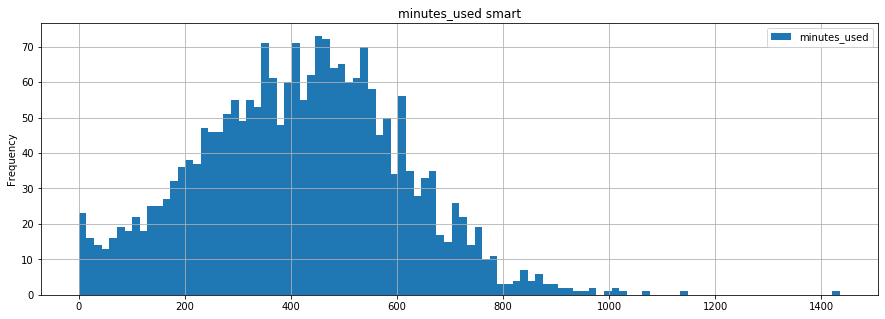

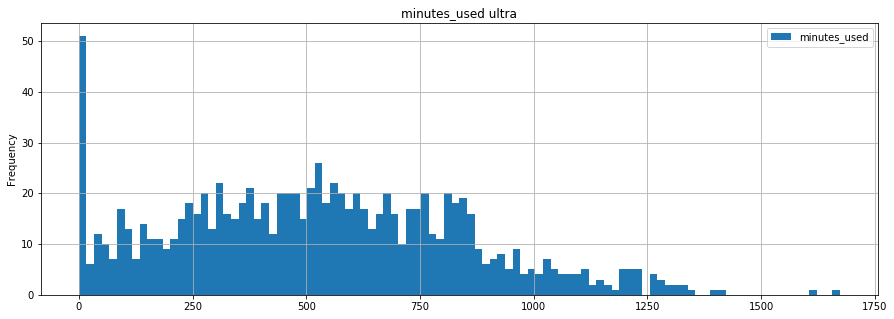

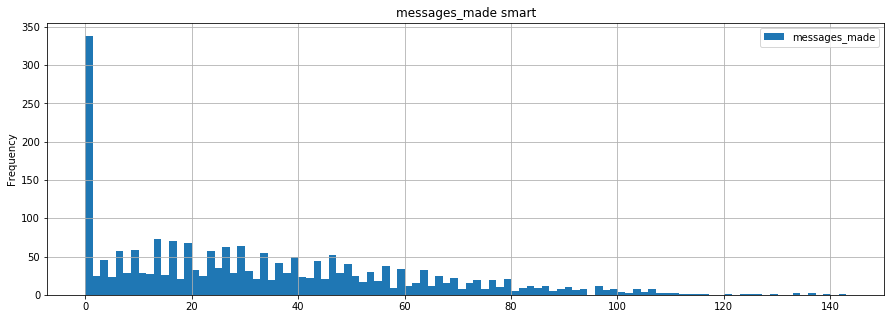

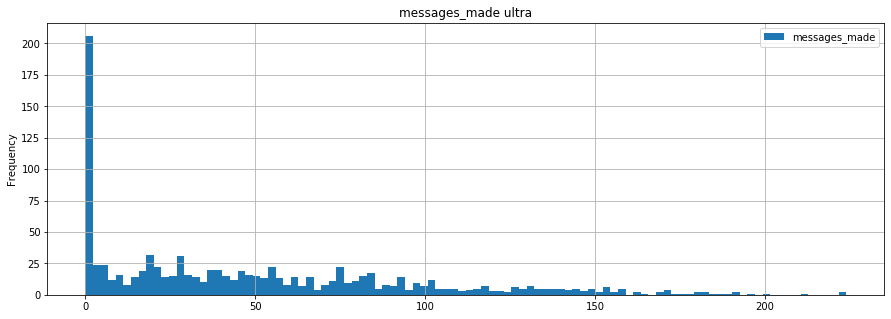

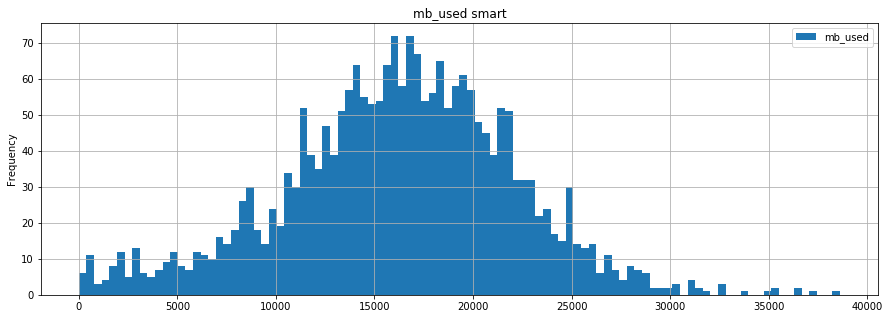

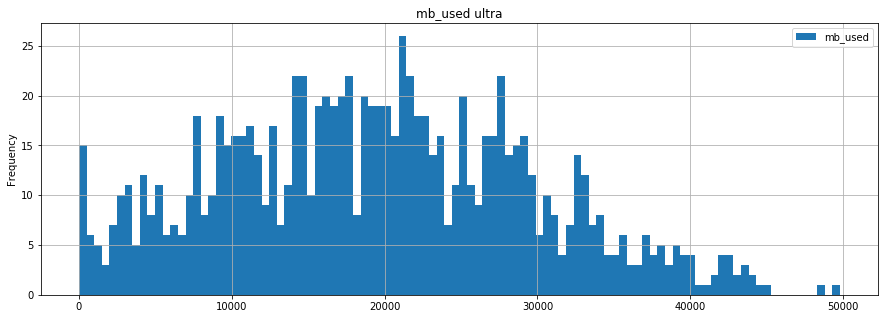

In [12]:
# Построим диаграммы распределения минут разговоров, отправленных сообщений и потребленного трафика
data_itog_smart.plot(title = 'minutes_used smart', kind='hist', y='minutes_used', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data_itog_ultra.plot(title = 'minutes_used ultra', kind='hist', y='minutes_used', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

data_itog_smart.plot(title = 'messages_made smart', kind='hist', y='messages_made', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data_itog_ultra.plot(title = 'messages_made ultra', kind='hist', y='messages_made', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

data_itog_smart.plot(title = 'mb_used smart', kind='hist', y='mb_used', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))
data_itog_ultra.plot(title = 'mb_used ultra', kind='hist', y='mb_used', bins=100, alpha=1, grid=True, legend=True, figsize=(15,5))

tariff_name
smart    AxesSubplot(0.125,0.125;0.775x0.755)
ultra    AxesSubplot(0.125,0.125;0.775x0.755)
Name: minutes_used, dtype: object

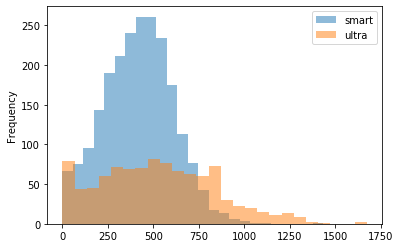

In [13]:
data_itog.groupby('tariff_name')['minutes_used'].plot.hist(alpha=0.5, legend=True, bins=25)

**Выводы** Из полученных данных мы видим, что абоненты, выбравшие тариф ultra, активнее пользуются мобильной связью, 
чем абоненты с тарифом smart, т.е. в месяц разговаривают больше минут, отправляют больше сообщений и потребляют больше трафика.
На графиках использования минут видим значительный выброс звонков с нулевым значением потребленных минут.
Скорее всего, симкарты с тарифом ultra чаще всего покупают только для выхода в Интернет и использования в планшете или компьютере.
Также мы видим, что многие абоненты обоих тарифных планов не отправляют СМС-сообщения.
Это может быть связано с широким распространением различных мессенджеров. Использование трафика абонентами тарифного плана 
ultra не такое равномерное, как в тарифе smart. Это объясняется тем, что многие абоненты ultra используют симкарту только
для Интернета, а некоторые и для Интернета, и для звонков.

## Проверка гипотез

In [14]:
# Нулевая гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.
# Адтернативная гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
# Проверим нулевую гипотезу и посчитаем среднюю выручку
alpha = 0.1 
results = st.ttest_ind(data_itog_smart['income'], data_itog_ultra['income'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
display(data_itog_smart['income'].mean())
display(data_itog_ultra['income'].mean())

p-значение: 1.7023268870439853e-158
Отвергаем нулевую гипотезу


1294.3053811659192

2070.943204868154

In [15]:
# Нулевая гипотеза: средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
# Адтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
# Проверим нулевую гипотезу и посчитаем среднюю выручку

data_itog_Moscow = data_itog[data_itog['city'] == 'Москва']
data_itog_Regions = data_itog[data_itog['city'] != 'Москва']

alpha = 0.01
results = st.ttest_ind(data_itog_Moscow['income'], data_itog_Regions['income'])
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
display(data_itog_Moscow['income'].mean())
display(data_itog_Regions['income'].mean())

p-значение: 0.5277299573181309
Не получилось отвергнуть нулевую гипотезу


1550.8052373158755

1528.1032629558542

**Выводы** Нулевая гипотеза должна содержать равенство. Мы видим, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Показатель альфа установлен на давольно высоком уровне: 0,1. Нулеавя гипотеза отвергнута.

В случае с определением разницы средней выручки абонентов из Москвы и из других городов мы видим, что средняя выручка отличается не существенно, таким образом, нулевая гипотеза подтверждена.

## Общий вывод

Мы провели исследование поведения пользователей, выбравших разные тарифы сотового оператора.

Предоставленный для анализа данные содержали ряд существенных недостатков, которые удалось устранить.

Мы посчитали отдельные важные показатели, необходимые нам для анализа: сколько каждый абонент каждый месяц совершает звонков, в т.ч. неотвеченных, тратит минут разговора, отправляет сообщений и расходует трафик. Далее выяснили, сколько сколько минут, сообщений и Гб каждый абонент расходует сверх лимита выбранного тарифа и посчитали выручку по каждому абоненту в месяц.

Произведенные расчеты позволили нам описать поведение абонентов для каждого из имеющихся тарифов.

Мы установили, что средняя выручка для различных тарифов различается. Сотовому оператору следует сосредоточиться на развитии
тарифов линейки ultra, как более выгодных.

А вот выручка в Москве практически не отличается от выручки в других городах и регионах.